## Introduction

This project is about scraping data and processing it to get information about emotions included in the Tweets.
The data is scraped using SNScrape. The emotions information is obtained using Vader and Text2Emotion libraries.

## Preprocessing

### Using Twitter module to scrape tweets

I was searching for 'Andrew Tate' phrase in 3 different time stamps
- Before becoming very popular on the internet
- When he was very popular on the internet and controversial
- After he was arrested

Therefore I have 3 loops that scrape tweets from different time stamps.

In [49]:
import snscrape.modules.twitter as sntwitter

I have a constant that defines the amount of tweets to get scraped

In [50]:
AMOUNT_OF_TWEETS = 10000

scraper_before_fame = sntwitter.TwitterSearchScraper('Andrew Tate lang:en since:2022-01-01 until:2022-01-07')
scraper_while_controversy = sntwitter.TwitterSearchScraper('Andrew Tate lang:en since:2022-08-21 until:2022-08-27')
scraper_after_arrest = sntwitter.TwitterSearchScraper('Andrew Tate lang:en')

sntwitter.TwitterTweetScraper('Andrew Tate').get_items()

tweets_before_fame = []
tweets_while_controversy = []
tweets_after_arrest = []

for i,tweet in enumerate(scraper_before_fame.get_items()):
    tweet_data = {
        "id": tweet.id,
        "content": tweet.rawContent,
    }
    tweets_before_fame.append(tweet_data)
    if i > AMOUNT_OF_TWEETS:
        break

for i,tweet in enumerate(scraper_while_controversy.get_items()):
    tweet_data = {
        "id": tweet.id,
        "content": tweet.rawContent,
    }
    tweets_while_controversy.append(tweet_data)
    if i > AMOUNT_OF_TWEETS:
        break

for i,tweet in enumerate(scraper_after_arrest.get_items()):
    tweet_data = {
        "id": tweet.id,
        "content": tweet.rawContent,
    }
    tweets_after_arrest.append(tweet_data)
    if i > AMOUNT_OF_TWEETS:
        break

import json

def save_to_file(tweets_list, file_name):
    with open(file_name, 'w') as outfile:
        json.dump(tweets_list, outfile)

save_to_file(tweets_before_fame, 'tweets_before_fame.json')
save_to_file(tweets_while_controversy, 'tweets_while_controversy.json')
save_to_file(tweets_after_arrest, 'tweets_after_arrest.json')

print(len(tweets_before_fame))
print(len(tweets_while_controversy))
print(len(tweets_after_arrest))

Unavailable user in card on tweet 1478699262007468035
User 1324742403492892673 not found in user refs in card on tweet 1478699262007468035
Stopping after 20 empty pages
Empty user ref object in card on tweet 1563306185586946051
Empty user ref object in card on tweet 1563306185586946051
User 4503599629184530 not found in user refs in card on tweet 1563306185586946051
User 4503599629184530 not found in user refs in card on tweet 1563306185586946051
Unavailable user in card on tweet 1562982832556744704
User 63178560 not found in user refs in card on tweet 1562982832556744704
Unavailable user in card on tweet 1562916347205394433
User 1382292481581096970 not found in user refs in card on tweet 1562916347205394433
Unavailable user in card on tweet 1562874707363315714
User 1382292481581096970 not found in user refs in card on tweet 1562874707363315714
Could not translate t.co card URL on tweet 1659786793682874368


116
10002
10002


## Tokenizing the tweets

In [51]:
from nltk.tokenize import word_tokenize

In [52]:
def tokenize(tweets_list):
    tokenized_tweets = []
    for tweet in tweets_list:
        tokenized_tweet = word_tokenize(tweet["content"])
        tweet_data = {
            "id": tweet["id"],
            "text": tokenized_tweet
        }
        tokenized_tweets.append(tweet_data)
    return tokenized_tweets

## Stopwords filtering every tweet

I had to add some stopwords to the list of stopwords that comes with NLTK library due to words "andrew" and "tate" being obviosuly very frequent in the tweets and not providing any usefull information. I also had to add "http" as things like link or videos were leaving that part as a word in the tweet.

In [53]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))
stop_words.add("https")
stop_words.add("andrew")
stop_words.add("tate")

def stopwords_filter(tweets_list):
    filtered_tweets = []
    for tweet in tweets_list:
        filtered_tweet = [word for word in tweet["text"] if not word.lower() in stop_words and word.isalpha()]
        tweet_data = {
            "id": tweet["id"],
            "text": filtered_tweet
        }
        filtered_tweets.append(tweet_data)
    return filtered_tweets

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\barto\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Lemmatization of the tweets

In [54]:
from nltk.stem import WordNetLemmatizer

In [55]:
lemmatizer = WordNetLemmatizer()

def lemmatization(tweets_list):
    lemmatized_tweets = []
    for tweet in tweets_list:
        lemmatized_tweet = [lemmatizer.lemmatize(word) for word in tweet["text"]]
        tweet_data = {
            "id": tweet["id"],
            "text": lemmatized_tweet
        }
        lemmatized_tweets.append(tweet_data)
    return lemmatized_tweets

In [56]:
# Before fame
tokenized_tweets_before_fame = tokenize(tweets_before_fame)
filtered_tokenized_tweets_before_fame = stopwords_filter(tokenized_tweets_before_fame)
lemmatized_filtered_tokenized_tokenized_tweets_before_fame = lemmatization(filtered_tokenized_tweets_before_fame)
# While controversy
tokenized_tweets_while_controversy = tokenize(tweets_while_controversy)
filtered_tokenized_tweets_while_controversy = stopwords_filter(tokenized_tweets_while_controversy)
lemmatized_filtered_tokenized_tokenized_tweets_while_controversy = lemmatization(filtered_tokenized_tweets_while_controversy)
# After arrest
tokenized_tweets_after_arrest = tokenize(tweets_after_arrest)
filtered_tokenized_tweets_after_arrest = stopwords_filter(tokenized_tweets_after_arrest)
lemmatized_filtered_tokenized_tokenized_tweets_after_arrest = lemmatization(filtered_tokenized_tweets_after_arrest)

## Opinion Analysis

### Most common words in the tweets

This can give us very brief view of what are the most common topics/emotions associated with the tweets.

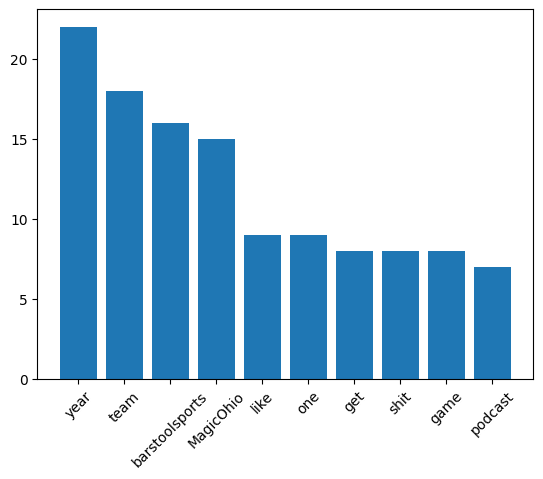

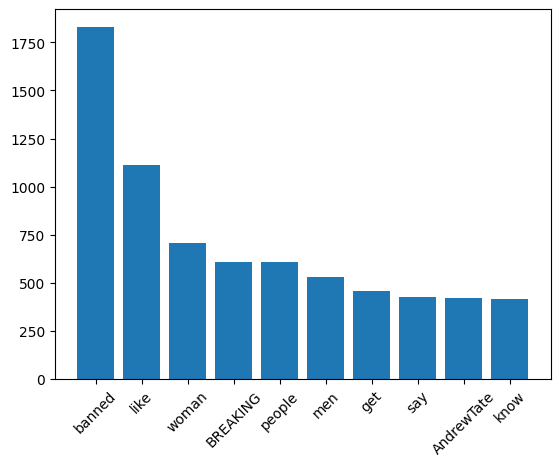

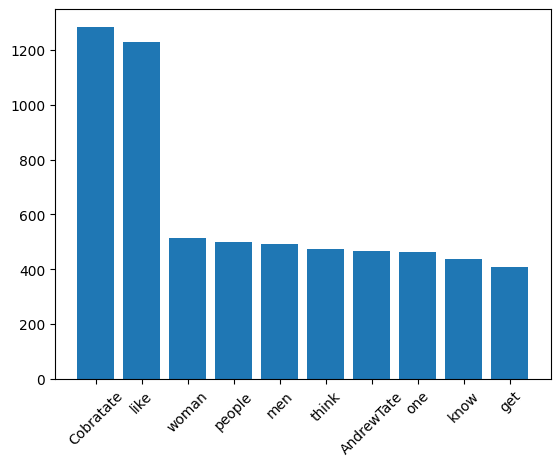

In [57]:
from collections import Counter
import matplotlib.pyplot as plt

# Wektor zliczający słowa
only_words_before_fame = [word for tweet in lemmatized_filtered_tokenized_tokenized_tweets_before_fame for word in tweet["text"]]
word_count_before_fame = Counter(only_words_before_fame)

only_words_while_controversy = [word for tweet in lemmatized_filtered_tokenized_tokenized_tweets_while_controversy for word in tweet["text"]]
word_count_while_controversy = Counter(only_words_while_controversy)

only_words_after_arrest = [word for tweet in lemmatized_filtered_tokenized_tokenized_tweets_after_arrest for word in tweet["text"]]
word_count_after_arrest = Counter(only_words_after_arrest)

top_words = word_count_before_fame.most_common(10)

labels = [word[0] for word in top_words]
values = [word[1] for word in top_words]

plt.bar(labels, values)
plt.xticks(rotation=45)

plt.show()

top_words = word_count_while_controversy.most_common(10)

# Przygotowanie danych do wykresu słupkowego
labels = [word[0] for word in top_words]
values = [word[1] for word in top_words]

# Wykres słupkowy
plt.bar(labels, values)
plt.xticks(rotation=45)

# Wyświetlenie wykresu
plt.show()

top_words = word_count_after_arrest.most_common(10)

# Przygotowanie danych do wykresu słupkowego
labels = [word[0] for word in top_words]
values = [word[1] for word in top_words]

# Wykres słupkowy
plt.bar(labels, values)
plt.xticks(rotation=45)

# Wyświetlenie wykresu
plt.show()


### Emotional analysis based on Vader Sentiment Intensity Analyzer (Positive, Neutral, Negative) and plotting the emotions analysis results

In [58]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

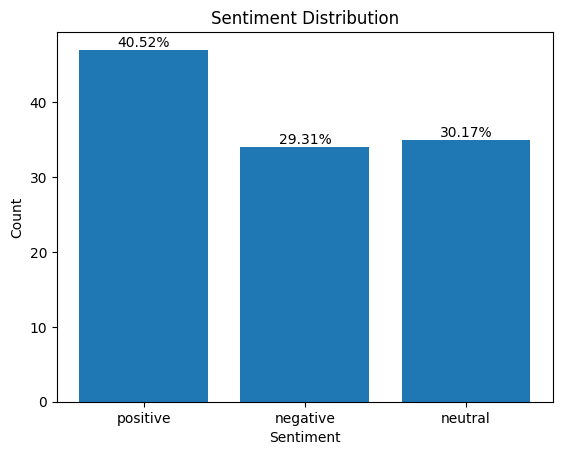

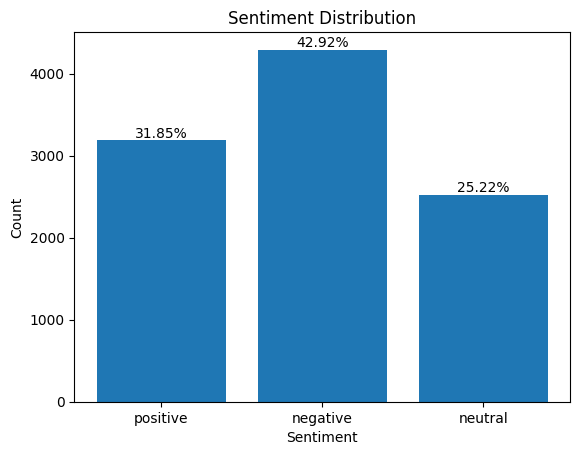

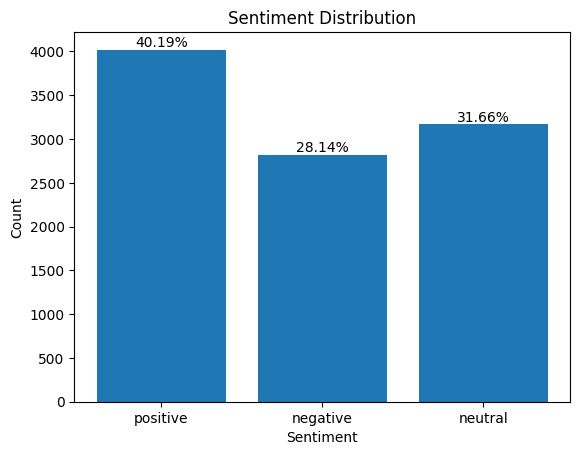

In [59]:
def plot_sentiment_intensity(tweets_list):
    sid = SentimentIntensityAnalyzer()

    positive_tweets = []
    negative_tweets = []
    neutral_tweets = []

    for tweet in tweets_list:
        tweet["sentiment"] = sid.polarity_scores(" ".join(tweet["text"]))
        if tweet["sentiment"]["compound"] > 0:
            positive_tweets.append(tweet)
        elif tweet["sentiment"]["compound"] < 0:
            negative_tweets.append(tweet)
        else:
            neutral_tweets.append(tweet)

    numbers = [len(positive_tweets), len(negative_tweets), len(neutral_tweets)]
    labels = ['positive', 'negative', 'neutral']

    plt.bar(labels, numbers)
    for i, num in enumerate(numbers):
        percentage = str(round(num/len(tweets_list) * 100, 2)) + "%"
        plt.text(i, num, percentage, ha='center', va='bottom')

    plt.title('Sentiment Distribution')
    plt.xlabel('Sentiment')
    plt.ylabel('Count')

    plt.show()

plot_sentiment_intensity(lemmatized_filtered_tokenized_tokenized_tweets_before_fame)
plot_sentiment_intensity(lemmatized_filtered_tokenized_tokenized_tweets_while_controversy)
plot_sentiment_intensity(lemmatized_filtered_tokenized_tokenized_tweets_after_arrest)

### Text2Emotion classifier

I have used Text2Emotion to classify the tweets into 5 emotions: happiness, anger, surprise, sadness, fear.

I have also plotted the results to see the differences in the emotions of the tweets.

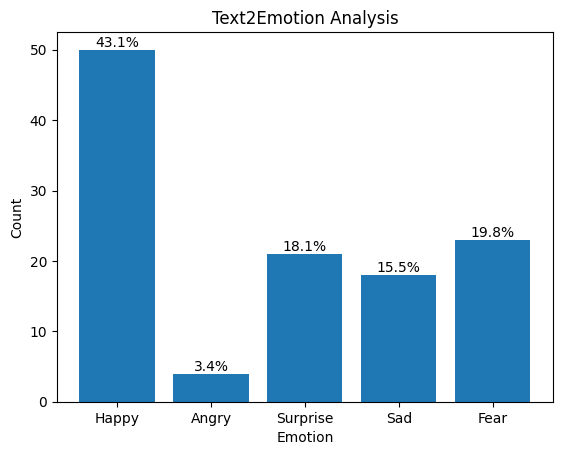

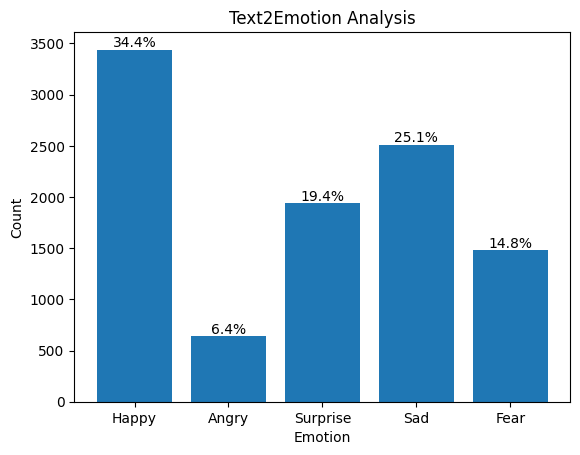

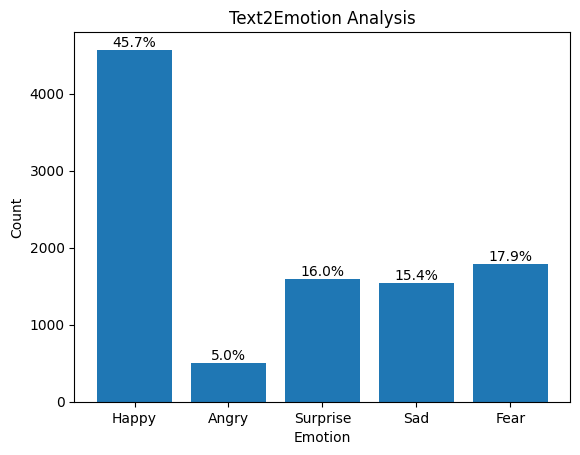

In [60]:
import text2emotion as te

def text2emotion_analysis(tweets_list):
    emotion_results = { "Happy": 0, "Angry": 0, "Surprise": 0, "Sad": 0, "Fear": 0 }
    emotion_tweets = []
    for tweet in tweets_list:
        tweet_emotions = te.get_emotion(" ".join(tweet["text"]))
        dominating_emotion = max(tweet_emotions, key=tweet_emotions.get)
        emotion_results[dominating_emotion] += 1
    
    numbers = [emotion_results["Happy"], emotion_results["Angry"], emotion_results["Surprise"], emotion_results["Sad"], emotion_results["Fear"]]
    labels = ['Happy', 'Angry', 'Surprise', 'Sad', 'Fear']

    plt.bar(labels, numbers)
    for i, num in enumerate(numbers):
        percentage = str(round(num/len(tweets_list) * 100, 1)) + "%"
        plt.text(i, num, percentage, ha='center', va='bottom')

    plt.title('Text2Emotion Analysis')
    plt.xlabel('Emotion')
    plt.ylabel('Count')

    plt.show()

emotion_tweets = text2emotion_analysis(lemmatized_filtered_tokenized_tokenized_tweets_before_fame)
emotion_tweets = text2emotion_analysis(lemmatized_filtered_tokenized_tokenized_tweets_while_controversy)
emotion_tweets = text2emotion_analysis(lemmatized_filtered_tokenized_tokenized_tweets_after_arrest)

### Creating a wordcloud for every time period

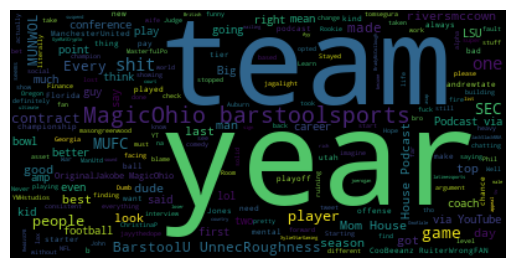

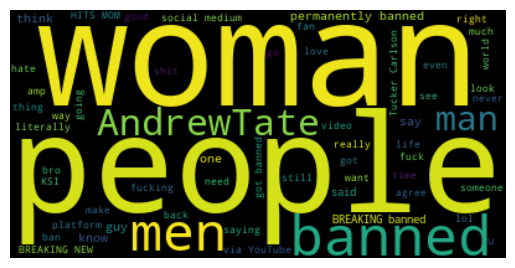

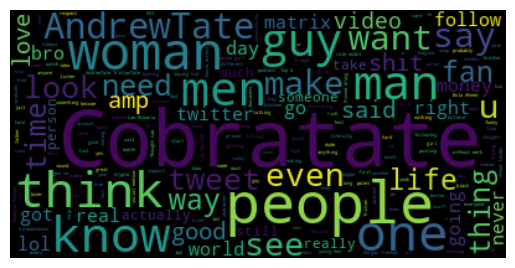

In [61]:
from wordcloud import WordCloud

text_before_fame = " ".join(only_words_before_fame)
text_while_controversy = " ".join(only_words_while_controversy)
text_after_arrest = " ".join(only_words_after_arrest)

wordcloud = WordCloud().generate(text_before_fame)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

plt.show()

wordcloud = WordCloud().generate(text_while_controversy)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

plt.show()

wordcloud = WordCloud().generate(text_after_arrest)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

plt.show()


## Conclusion

Looking at the plots you can see differences in the emotions of the tweets. Before becoming popular they were mostly neutral/positive. Then changed at his first peak of popularity (before even bigger peak when he got arrested) to negative. And after he was arrested there was more positive tweets again (probably because his activity on twitter).

As you can see the "Happy" is very simillar throughtout all 3 time stamps. The changes in other emotions may be caused by the fact that Andrew is a controversial personality. That is probably the reason why sadness rose at his peak due to his controversial tweets and opinions that he shared. 

After he was arrested the sadness went down but fear rose due to the fact that the situation still was not over but the release of Tate brothers made it so people again started talking about them. 

One fact that probably added a lot to that was supposed poisoning of Andrew that could have added to the fear of the people.

With time you could see the changes in emotions of the tweets as well as whether they were positive, negative or neutral.